
# Перспективный тариф для телекома

## О проекте

### Описание проекта 
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. <br>
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
**Тариф «Смарт»** <br>
Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
*Стоимость услуг сверх тарифного пакета:* <br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей<br>
**Тариф «Ультра»**<br>
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
*Стоимость услуг сверх тарифного пакета:* <br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей

*Примечание: <br>
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.<br>
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

### Описание данных
**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя<br>
- first_name — имя пользователя<br>
- last_name — фамилия пользователя<br>
- age — возраст пользователя (годы)<br>
- reg_date — дата подключения тарифа (день, месяц, год)<br>
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
- city — город проживания пользователя<br>
- tarif — название тарифного плана

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка<br>
- call_date — дата звонка<br>
- duration — длительность звонка в минутах<br>
- user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения<br>
- message_date — дата сообщения<br>
- user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии<br>
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
- session_date — дата интернет-сессии<br>
- user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа<br>
- rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
- messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со  - 101 минуты будет взиматься плата)<br>
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

## Изучение данных из файлов

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
# загрузка датасетов
try:
    df_users = pd.read_csv('users.csv')
    df_calls = pd.read_csv('calls.csv')
    df_messages = pd.read_csv('messages.csv')
    df_internet = pd.read_csv('internet.csv')
    df_tariffs = pd.read_csv('tariffs.csv')
except:
    df_users = pd.read_csv('/datasets/users.csv')
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
#cнизим размерность чисел для вывода на экран на всем проекте
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# рассмотрим содержаимое датасетов
display(df_users.head(5))
display(df_calls.head(5))
display(df_messages.head(5))
display(df_internet.head(5))
display(df_tariffs.head(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
# рассмотрим содержаимое датасетов
df_users.info()
df_calls.info()
df_messages.info()
df_internet.info()
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.D

In [6]:
#рассмотрим описание данных
display(df_users.describe())
display(df_calls.describe())
display(df_messages.describe())
df_internet.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


- Имеем 5 таблиц с данными пользователей по использованию тарифов и само описание тарифов;<br>
- Пользователей тарифов в выборке 500;<br>
- Пропуски имеет только колонка `churn_date` в таблице `users`, которая означает, что пользователи все еще пользуются тарифом. То есть нет необходоимсти заниматься заполнением пропусков;<br>
- Количество мегабайт за сесиию не превышает 1724МБ, что выглядит как достаточно достовернные цифры, которые не нужно корректировать. Необходимо только удалить стобец `unnamed`, который явно дублирует номер строки; <br>
- Максимальное количество минут звонков за сесию - 38, что тоже не выгдядит как что-то невероятное. <br>

**Собранные данные выглядят достаточно достоверными и не требуют корректировок.**

## Предобработка данных

In [7]:
#удалим лишний столбец в таблице df_internet
df_internet.drop('Unnamed: 0', inplace=True, axis=1)

In [8]:
#очистим датасеты от явных дубликатов
df_users = df_users.drop_duplicates()
df_calls = df_calls.drop_duplicates()
df_messages = df_messages.drop_duplicates()
df_internet = df_internet.drop_duplicates()

In [9]:
#отформатирум столбы с датами во всех таблица
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

- Удалили лишние столбцы.
- Очистили датасеты от явных дубликатов.
- Отформатировали столбцы с месяцами в формат даты.

## Расчеты и добавление данных в таблицу

Поскольку нам необходимо оценить тарифы с точки зрения экономической выгоды, для анализа необходимо добавить столбец с месяцами, который позволит нам оценить уровень затрат пользователя в зависимости от тарифа.

In [10]:
#добавим столбцы с номером месяца ко всем таблицам
df_users['month_reg'] = pd.DatetimeIndex(df_users['reg_date']).month
df_users['month_churn'] = pd.DatetimeIndex(df_users['churn_date']).month
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

Для удобства анализа, переведем в гигабайты с округлением вверх данные в таблице с траффиком.

In [11]:
df_tariffs['mb_per_month_included']=df_tariffs['mb_per_month_included']/1024
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.00,500,550,200,3,3,smart
1,1000,30.00,3000,1950,150,1,1,ultra


In [12]:
#объявим переменную год для быстрого обращения после построения сводных таблиц
year=[1,2,3,4,5,6,7,8,9,10,11,12]

In [13]:
#округлим минуты вверх согласно условиям тарифа для коррректного учета
df_calls['duration']=df_calls['duration'].apply(np.ceil)

Соберем сводные таблицы по звонкам, сообщениям и использованию интернета. Мегабайты для удобства сразу переведем в гигабайты и округлим вверх согласно условиям тарифа.

In [14]:
#сводная таблица по времени звонков
pivot_calls=df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum').reset_index()
pivot_calls.head(5)

,user_id,month,duration
0,1000,5,159.00
1,1000,6,172.00
2,1000,7,340.00
3,1000,8,408.00
4,1000,9,466.00


In [15]:
#сводная таблица по сообщениям
pivot_messages=df_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count').reset_index()
pivot_messages.rename(columns={'id':'messages'}, inplace=True)
pivot_messages.head(5)

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [16]:
#сводная таблица по интернет-траффику с округлением переводом в гигабайты и округлением вверх
pivot_internet=df_internet.pivot_table(index=['user_id','month'],  values='mb_used', aggfunc='sum').reset_index()
pivot_internet['gb_used']=(pivot_internet['mb_used']/1024).apply(np.ceil)
pivot_internet.drop(columns=['mb_used'], inplace=True)
pivot_internet.head(5)

,user_id,month,gb_used
0,1000,5,3.00
1,1000,6,23.00
2,1000,7,14.00
3,1000,8,14.00
4,1000,9,15.00


In [17]:
#объеденим таблицы и добавим столбцы с информацией о пользователях
df =(pivot_calls.merge(pivot_messages, on=['user_id','month']).merge(pivot_internet, on=['user_id','month'])
          .merge(df_users, on='user_id', how='left'))
#удалим столбцы, которые в последствии не будут использоваться, такие как
df.drop(columns=['churn_date','first_name','last_name','reg_date'], inplace=True)
df.head()

,user_id,month,duration,messages,gb_used,age,city,tariff,month_reg,month_churn
0,1000,5,159.00,22,3.00,52,Краснодар,ultra,5,NaN
1,1000,6,172.00,60,23.00,52,Краснодар,ultra,5,NaN
2,1000,7,340.00,75,14.00,52,Краснодар,ultra,5,NaN
3,1000,8,408.00,81,14.00,52,Краснодар,ultra,5,NaN
4,1000,9,466.00,57,15.00,52,Краснодар,ultra,5,NaN


Добавим в таблицу столбцы с данными о том, сколько пользователю стоил каждый пункт его тарифа и тариф целиком.

In [18]:
#функция для стоимости звонков
def duration_cost(row):
    tariff=row['tariff']
    duration=row['duration']
    if tariff=='ultra':
        if duration < 3000:
            return 0
        else:
            return (duration - 3000)*1 #стоимость минуты сверх тарифа
    else:
        if duration < 500:
            return 0
        else:
            return (duration - 500)*3 #стоимость минуты сверх тарифа
#функция для стоимости сообщений
def messages_cost(row):
    tariff=row['tariff']
    messages=row['messages']
    if tariff=='ultra':
        if messages < 1000:
            return 0
        else:
            return (messages - 1000)*1 #стоимость сообщения сверх тарифа
    else:
        if messages < 50:
            return 0
        else:
            return (messages - 50)*3 #стоимость сообщения сверх тарифа
#функция для стоимости интернета
def internet_cost(row):
    tariff=row['tariff']
    gb_used=row['gb_used']
    if tariff=='ultra':
        if gb_used < 30:
            return 0
        else:
            return (gb_used - 30)*150 #стоимость гигабайта сверх тарифа
    else:
        if gb_used < 15:
            return 0
        else:
            return (gb_used - 15)*200 #стоимость гигабайта сверх тарифа
#функция для полной стоимости тарифа
def full_cost(row):
    tariff=row['tariff']
    call_cost=row['call_cost']
    messages_cost=row['messages_cost']
    internet_cost=row['internet_cost']
    if tariff=='ultra':
        return (call_cost+messages_cost+ internet_cost+1950) #стоимость тарифа
    else:
        return (call_cost+messages_cost+ internet_cost+550) #стоимость тарифа

In [19]:
#применим функции и создадим соответствующие столбцы
df['call_cost']=df.apply(duration_cost, axis=1)
df['messages_cost']=df.apply(messages_cost, axis=1)
df['internet_cost']=df.apply(internet_cost, axis=1)
df['full_cost']=df.apply(full_cost, axis=1)
df.head()

,user_id,month,duration,messages,gb_used,age,city,tariff,month_reg,month_churn,call_cost,messages_cost,internet_cost,full_cost
0,1000,5,159.00,22,3.00,52,Краснодар,ultra,5,NaN,0.00,0,0.00,"1,950.00"
1,1000,6,172.00,60,23.00,52,Краснодар,ultra,5,NaN,0.00,0,0.00,"1,950.00"
2,1000,7,340.00,75,14.00,52,Краснодар,ultra,5,NaN,0.00,0,0.00,"1,950.00"
3,1000,8,408.00,81,14.00,52,Краснодар,ultra,5,NaN,0.00,0,0.00,"1,950.00"
4,1000,9,466.00,57,15.00,52,Краснодар,ultra,5,NaN,0.00,0,0.00,"1,950.00"


Подготовлена и собрана таблица с данными по пользователям и месяцам, добавлены стоимости каждого из вида услуг для пользователя и общая стоимость тарифа с учетом дополнительных трат.

## Исследовательский анализ данных

In [20]:
#рассмотрим сколько было пользователей и каждого из тарифов
display (len(df[df['tariff']=='ultra']['user_id'].unique()))
len(df[df['tariff']=='smart']['user_id'].unique())

118

301

In [21]:
#определим размер выборки для каждого тарифа
df.pivot_table(index='tariff', values='user_id', aggfunc='count').reset_index()

,tariff,user_id
0,smart,1915
1,ultra,752


In [22]:
#построим таблицу средний затрат на сверхтарифные статьи
df.pivot_table(index='tariff', values=['call_cost','messages_cost','internet_cost','full_cost']).reset_index()

,tariff,call_cost,full_cost,internet_cost,messages_cost
0,smart,124.92,"1,290.68",595.51,20.25
1,ultra,0.00,"2,048.94",98.94,0.00


In [23]:
#построим таблицу среднего потребления каждого из видов услуг
df.pivot_table(index='tariff', values=['duration','messages','gb_used']).reset_index()

,tariff,duration,gb_used,messages
0,smart,421.03,16.36,38.77
1,ultra,556.86,19.62,61.64


In [24]:
#рассмотрим данные по тарифу ультра
df[df['tariff']=='ultra'].describe()

,user_id,month,duration,messages,gb_used,age,month_reg,month_churn,call_cost,messages_cost,internet_cost,full_cost
count,752.00,752.00,752.00,752.00,752.00,752.00,752.00,41.00,752.00,752.00,752.00,752.00
mean,"1,274.87",8.40,556.86,61.64,19.62,45.87,4.83,10.44,0.00,0.00,98.94,"2,048.94"
std,142.29,2.81,311.86,44.82,9.39,17.22,2.80,1.05,0.00,0.00,332.89,332.89
min,"1,000.00",1.00,0.00,1.00,0.00,18.00,1.00,9.00,0.00,0.00,0.00,"1,950.00"
25%,"1,151.00",6.00,331.75,25.00,12.00,29.00,2.75,10.00,0.00,0.00,0.00,"1,950.00"
50%,"1,310.00",9.00,537.50,53.00,19.00,45.00,4.00,10.00,0.00,0.00,0.00,"1,950.00"
75%,"1,385.00",11.00,760.25,89.00,27.00,61.00,6.25,11.00,0.00,0.00,0.00,"1,950.00"
max,"1,495.00",12.00,"1,673.00",224.00,49.00,75.00,12.00,12.00,0.00,0.00,"2,850.00","4,800.00"


In [25]:
#рассмотрим данные по тарифу смарт
df[df['tariff']=='smart'].describe()

,user_id,month,duration,messages,gb_used,age,month_reg,month_churn,call_cost,messages_cost,internet_cost,full_cost
count,"1,915.00","1,915.00","1,915.00","1,915.00","1,915.00","1,915.00","1,915.00",98.00,"1,915.00","1,915.00","1,915.00","1,915.00"
mean,"1,247.92",8.32,421.03,38.77,16.36,46.91,4.67,10.74,124.92,20.25,595.51,"1,290.68"
std,147.15,2.93,187.71,26.81,5.67,16.16,2.98,1.25,252.66,42.84,740.27,822.83
min,"1,002.00",1.00,0.00,1.00,0.00,18.00,1.00,8.00,0.00,0.00,0.00,550.00
25%,"1,123.00",6.00,287.50,17.00,13.00,34.00,2.00,10.00,0.00,0.00,0.00,553.00
50%,"1,244.00",9.00,427.00,34.00,17.00,47.00,4.00,11.00,0.00,0.00,400.00,"1,012.00"
75%,"1,383.00",11.00,547.00,55.00,20.00,62.00,7.00,12.00,141.00,15.00,"1,000.00","1,750.00"
max,"1,499.00",12.00,"1,435.00",143.00,38.00,75.00,12.00,12.00,"2,805.00",279.00,"4,600.00","6,770.00"


In [26]:
#найдем стандартную ошибку для каждого из значений в зависимости от тарифа
def ESE(column, tariff):
    return df[df['tariff']==tariff][column].std()/((len(df[df['tariff']==tariff][column]))**.5)
print ('Стандартная ошибка для звонков тарифа смарт:', ESE('duration', 'smart'))
print ('Стандартная ошибка для звонков тарифа ультра:',ESE('duration', 'ultra'))
print ('Стандартная ошибка для сообщений тарифа смарт:',ESE('messages', 'smart'))
print ('Стандартная ошибка для сообщений тарифа ульра:',ESE('messages', 'ultra'))
print ('Стандартная ошибка для использования интернета тарифа смарт:',ESE('gb_used', 'smart'))
print ('Стандартная ошибка для использования интернета тарифа ульра:',ESE('gb_used', 'ultra'))

Стандартная ошибка для звонков тарифа смарт: 4.289528053876077
Стандартная ошибка для звонков тарифа ультра: 11.372466545305025
Стандартная ошибка для сообщений тарифа смарт: 0.6126617096017113
Стандартная ошибка для сообщений тарифа ульра: 1.6343023477942695
Стандартная ошибка для использования интернета тарифа смарт: 0.1295975100127281
Стандартная ошибка для использования интернета тарифа ульра: 0.34234105984837443


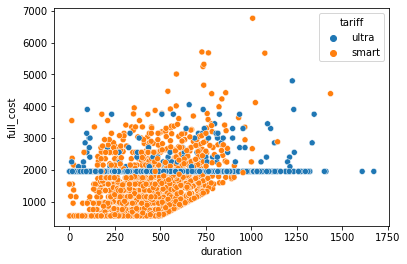

In [27]:
#построим диаграмму рассеяния использования минут звонков 
sns.scatterplot(x='duration', y='full_cost', hue='tariff', data=df, ci=None);

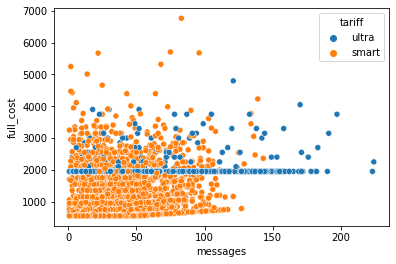

In [28]:
#построим диаграмму рассеяния использования сообщений
sns.scatterplot(x='messages', y='full_cost', hue='tariff', data=df, ci=None);

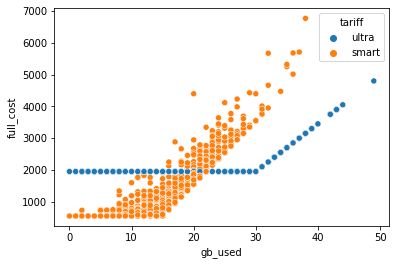

In [29]:
#построим диаграмму рассеяния использования интернета
sns.scatterplot(x='gb_used', y='full_cost', hue='tariff', data=df, ci=None);

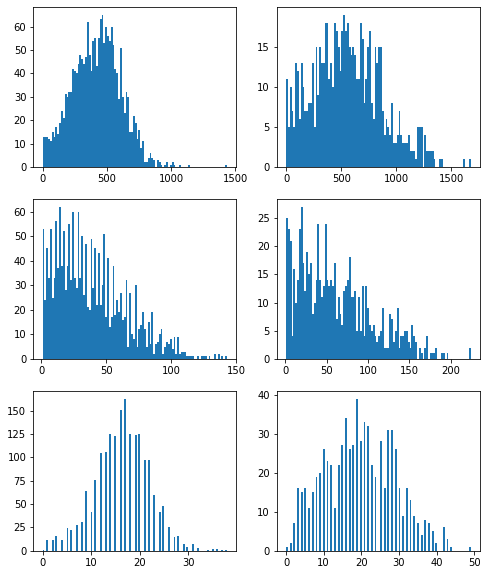

In [30]:
#построим гистаграммы распределения разных статей тарифов
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,10))
axes[0,0].hist(df[df['tariff']=='smart']['duration'], bins=100, label='smart')
axes[0,1].hist(df[df['tariff']=='ultra']['duration'], bins=100, label='ultra')
axes[1,0].hist(df[df['tariff']=='smart']['messages'], bins=100, label='smart')
axes[1,1].hist(df[df['tariff']=='ultra']['messages'], bins=100, label='ultra')
axes[2,0].hist(df[df['tariff']=='smart']['gb_used'], bins=100, label='smart')
axes[2,1].hist(df[df['tariff']=='ultra']['gb_used'], bins=100, label='ultra')
plt.show()

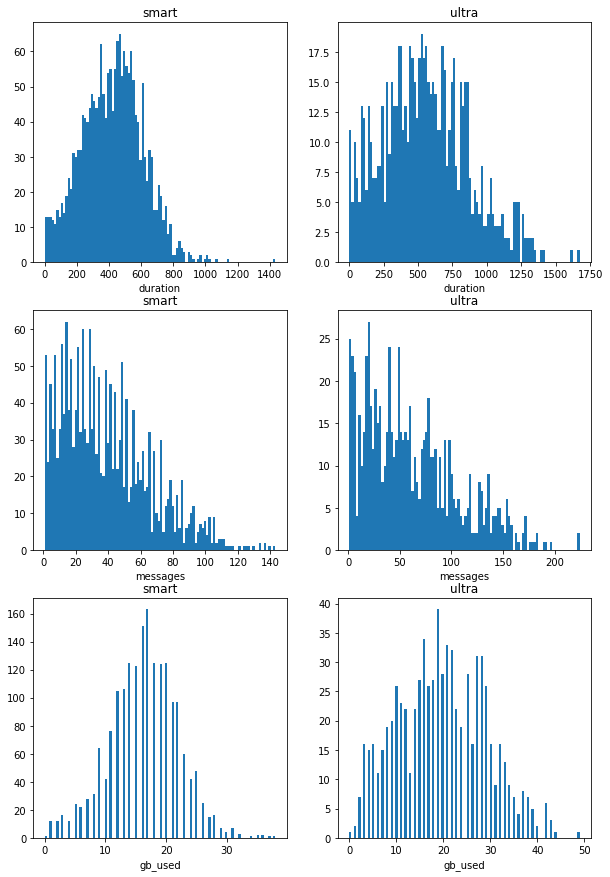

In [31]:
#построим гистаграммы распределения разных статей тарифов
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
plt.hist(df[df['tariff']=='smart']['duration'], bins=100, label='smart')
plt.title('smart')
plt.xlabel('duration')
plt.subplot(3,2,2)
plt.hist(df[df['tariff']=='ultra']['duration'], bins=100, label='ultra')
plt.title('ultra')
plt.xlabel('duration')
plt.subplot(3,2,3)
plt.hist(df[df['tariff']=='smart']['messages'], bins=100, label='smart')
plt.title('smart')
plt.xlabel('messages')
plt.subplot(3,2,4)
plt.hist(df[df['tariff']=='ultra']['messages'], bins=100, label='ultra')
plt.title('ultra')
plt.xlabel('messages')
plt.subplot(3,2,5)
plt.hist(df[df['tariff']=='smart']['gb_used'], bins=100, label='smart')
plt.title('smart')
plt.xlabel('gb_used')
plt.subplot(3,2,6)
plt.hist(df[df['tariff']=='ultra']['gb_used'], bins=100, label='ultra')
plt.title('ultra')
plt.xlabel('gb_used')
plt.show()

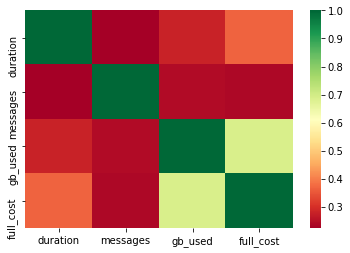

In [32]:
#построим хитмэп для корреляции полной стоимости от различных данных для всех пользователей
sns.heatmap(df[['duration', 'messages','gb_used', 'full_cost']].corr(),cmap='RdYlGn');

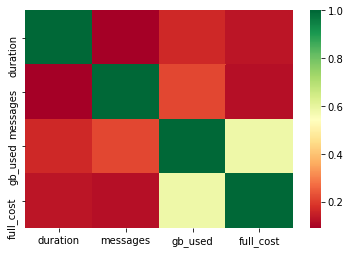

In [33]:
#построим хитмэп для корреляции полной стоимости от различных данных для пользователей тарифа ультра
sns.heatmap(df[df['tariff']=='ultra'][['duration', 'messages','gb_used', 'full_cost']].corr(),cmap='RdYlGn');

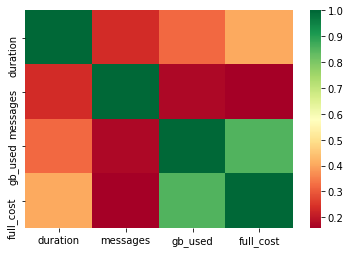

In [34]:
#построим хитмэп для корреляции полной стоимости от различных данных для пользователей тарифа смарт
sns.heatmap(df[df['tariff']=='smart'][['duration', 'messages','gb_used', 'full_cost']].corr(),cmap='RdYlGn');

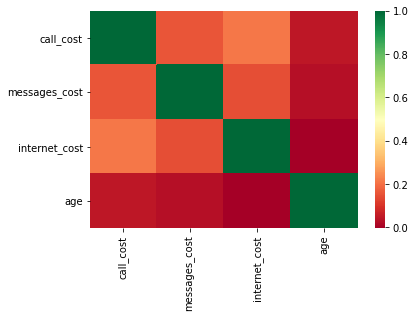

In [35]:
#построим хитмэп для корреляции возраста и стоимости сверхлимитного вида услуг для всех тарифов
sns.heatmap(df[['call_cost','messages_cost','internet_cost', 'age']].corr(),cmap='RdYlGn');

**Выводы из анализа данных:**
- общее количество пользователей тарифа смарт в 3 раза выше, сумма пользователей больше количества уникальных пользователей, значит какие-то из клиентов менял тариф в последствии;
- касательно использования тарифов: пользователи тарифа смарт в среднем тратят 421 минуту, 39 сообщений, 16ГБ интернета. Ультра - 556 минут, 20ГБ, 62 сообщения.
- в среднем, пользователи тарифа ультра не тратят деньги на сверхтарифные минуты и сообщения, в то время как на тарифе смарт, траты на минуты составляют 20% сверх стоимости тарифа, однако такие траты несут менее половины пользователей. Интернет на тарифе ультра приносит в среднем сверх 100 рублей или 5%, но тратят его так же очень малый процент пользователей. На тарифе смарт же стоимость интернета в среднем превышает стоимость тарифа в общем. Получается что в нашем цифровом мире основной драйвер для тарифа - это интернет.
- средний возраст, медиана по возрасту и стандартные отклонения имеют близкие показатели, не стоит по нему дифферицировать пользователей, так же, судя по корреляции, от возраста не зависит, тратит ли клиент сверхлимитные минуты;
- визуальное отображение диаграмм рассеивания и хитмэпов подтверждает ранее сказанный тезис об основном драйвере стоимости тарифа - интернете: именно на его диаграмме рассеивания мы видим самый резкий рост стоимости тарифа, в зависимости от его использования. Звонки имеют несколько меньшее влияние на стоимость тарифа. Сообщения можно в целом отбросить, конечно, во времена соц. сетей и мессенджеров эти "траты" уже зашиты в пользование интернетом.
- если говорить о распределениях, то звонки и пользование интернетом имеют вид нормального распределения, однако у тарифа ультра данное распределение меньше похоже на нормальное распределение, что может быть связано с тем, что у тарифа смарт количество пользоватлей в 3 раза больше, значит больше и выборка. Распредление количества сообщений напоминает распределение Пуссона.

## Проверка гипотез

Провека гипотезы о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются:
- нулевая гипотеза - средняя выручка пользователей тарифов ультра равны;
- поскольку размеры выборок разные параметр `equal_var` задаем как `False`;
- размеры выборок составляют 1900 и 700 значений, что немало, поэтому согласно ЦПТ примем, что средние генеральной совокупности распределены нормально.

In [38]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df[df['tariff']=='smart']['full_cost'], 
    df[df['tariff']=='ultra']['full_cost'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
#выведем на экран средние
stfmean=df[df['tariff']=='smart']['full_cost'].mean()
print(f'Среднее стоимость тарифа смарт = {stfmean:.2f}')
utfmean=df[df['tariff']=='ultra']['full_cost'].mean()
print(f'Среднее стоимость тарифа ультра = {utfmean:.2f}')

p-значение:  1.611142309615284e-209
Отвергаем нулевую гипотезу
Среднее стоимость тарифа смарт = 1290.68
Среднее стоимость тарифа ультра = 2048.94


Средняя выручка тарифов Ультра и Смарт различаются.

Аналогичная проверка гипотезы о том, что средняя выручка пользователей в Москве и других городах различаются:
- нулевая гипотеза - средняя выручка пользователей тарифов ультра равны;
- поскольку размеры выборок разные параметр `equal_var` задаем как `False`;
- размеры выборок составляют 2000 и 500 значений, что немало, поэтому согласно ЦПТ примем, что средние генеральной совокупности распределены нормально.

In [39]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df[df['city']!='Москва']['full_cost'], 
    df[df['city']=='Москва']['full_cost'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
#выведем на экран средние
scfmean=df[df['city']!='Москва']['full_cost'].mean()
print(f'Среднее стоимость тарифа смарт = {scfmean:.2f}')
ucfmean=df[df['city']=='Москва']['full_cost'].mean()
print(f'Среднее стоимость тарифа ультра = {ucfmean:.2f}')

p-значение:  0.11142595553000383
Не получилось отвергнуть нулевую гипотезу
Среднее стоимость тарифа смарт = 1493.15
Среднее стоимость тарифа ультра = 1554.71


Средняя выручка пользователей в Москве и других городах схожи.

**Выводы:**
- проверка гипотезы о различиях выручки тарифов смарт и ультра верна, стоимость тарифов слишком разная, чтобы говорить об одинаковой доходности каждого тарифа;
- проверка гипотезы о различихя выборки Москвы и остальных городов не подтвердилась, похоже, телеком, это то немногое, что стирает границу между городами.

## Выводы

- Имеем 5 таблиц с данными пользователей по использованию тарифов и само описание тарифов;<br>
- Пользователей тарифов в выборке 500;<br>
- Собранные данные выглядят достаточно достоверными и не требуют корректировок. <br>
- При обработке данных: удалили лишние столбцы, очистили датасеты от явных дубликатов, отформатировали столбцы с месяцами в формат даты.<br>
- Общее количество пользователей тарифа смарт в 3 раза выше, сумма пользователей больше количества уникальных пользователей, значит какие-то из клиентов менял тариф в последствии.
- Касательно использования тарифов: пользователи тарифа смарт в среднем тратят 421 минуту, 39 сообщений, 16ГБ интернета. Ультра - 556 минут, 20ГБ, 62 сообщения.
- В среднем, пользователи тарифа ультра не тратят деньги на сверхтарифные минуты и сообщения, в то время как на тарифе смарт, траты на минуты составляют 20% сверх стоимости тарифа, однако такие траты несут менее половины пользователей. Интернет на тарифе ультра приносит в среднем сверх 100 рублей или 5%, но тратят его так же очень малый процент пользователей. На тарифе смарт же стоимость интернета в среднем превышает стоимость тарифа в общем. Получается что в нашем цифровом мире основной драйвер для тарифа - это интернет.
- Средний возраст, медиана по возрасту и стандартные отклонения имеют близкие показатели, не стоит по нему дифферицировать пользователей, так же, судя по корреляции, от возраста не зависит, тратит ли клиент сверхлимитные минуты.
- Если говорить о распределениях, то звонки и пользование интернетом имеют вид нормального распределения, однако у тарифа ультра данное распределение меньше похоже на нормальное распределение, что может быть связано с тем, что у тарифа смарт количество пользоватлей в 3 раза больше, значит больше и выборка. Распредление количества сообщений напоминает распределение Пуссона.
- Проверка гипотезы о различиях выручки тарифов смарт и ультра верна, стоимость тарифов слишком разная, чтобы говорить об одинаковой доходности каждого тарифа.
- Проверка гипотезы о различихя выборки Москвы и остальных городов не подтвердилась, похоже, телеком, это то немногое, что стирает границу между городами.